<a href="https://colab.research.google.com/github/ridwanabdiansah29/Submission-Dicoding-TIMESERIES/blob/main/RIDWAN_ABDIANSAH_M193X0386_M06_TIMESERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ridwan Abdiansah <br>
M193X0386<br>
M06

##Import Library

In [71]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

##Loading Data

In [72]:
df = pd.read_csv('1_Daily_minimum_temps.csv')
df.head()

,Date,Temp
0,01/01/81,20.7
1,01/02/81,17.9
2,01/03/81,18.8
3,01/04/81,14.6
4,01/05/81,15.8


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3650 non-null   object
 1   Temp    3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [74]:
#ubah tipe data kolom
df['Temp'] = df['Temp'].apply(pd.to_numeric, errors='coerce')

In [76]:
df.isnull().sum()

Date    0
Temp    3
dtype: int64

In [77]:
df = df.dropna()

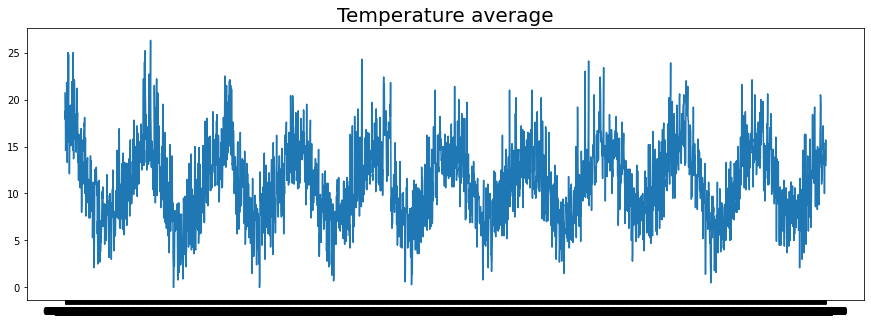

In [78]:
dates = df['Date'].values
temp  = df['Temp'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

#splitdata

In [84]:
num_latih = int(len(df) * 0.8)
print("total data", len(df))

data_latih = df.iloc[0:num_latih]
data_val = df.iloc[num_latih:]
print("total latih", len(data_latih))
print("total val", len(data_val))

total data 3647
total latih 2917
total val 730


In [85]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler()
temp_transformer = transformer.fit(latih[['Temp']])

latih['Temp'] = temp_transformer.transform(latih[['Temp']])

test['Temp'] = temp_transformer.transform(test[['Temp']])

ValueError: ignored

In [86]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [87]:
latih_temp = data_latih['Temp'].values
latih_set = windowed_dataset(
    latih_temp,
    window_size=60,
    batch_size=100,
    shuffle_buffer=1000
)

In [88]:
val_temp = data_val['Temp'].values
val_set = windowed_dataset(
    val_temp,
    window_size=60,
    batch_size=10,
    shuffle_buffer=1000
)

##modelling

In [89]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(16, return_sequences=True),
  tf.keras.layers.LSTM(32),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1),
])

In [91]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

In [92]:
threshold = (data_latih['Temp'].max()-data_latih['Temp'].min()) * 10/100
print("threshold {:.3f}".format(threshold))

threshold 2.630


In [93]:
class my_allback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae') < threshold):
            print("MAE has reached below 10%")

    def on_train_end(self, epoch, logs={}):
        print('Done')

callbacks = my_allback()

In [94]:
history = model.fit(
    latih_set,
    validation_data=val_set,
    callbacks=[callbacks],
    epochs=100,
    verbose=1,
)

Epoch 1/100
29/29 [==============================] - 9s 145ms/step - loss: 8.7793 - mae: 9.2765 - val_loss: 5.0237 - val_mae: 5.5068
Epoch 2/100
29/29 [==============================] - 3s 95ms/step - loss: 3.9935 - mae: 4.4680 - val_loss: 2.9027 - val_mae: 3.3700
Epoch 3/100
29/29 [==============================] - 3s 94ms/step - loss: 3.5884 - mae: 4.0630 - val_loss: 2.6021 - val_mae: 3.0673
Epoch 4/100
29/29 [==============================] - 3s 95ms/step - loss: 3.1519 - mae: 3.6227 - val_loss: 1.7766 - val_mae: 2.2250
Epoch 5/100
29/29 [==============================] - 3s 92ms/step - loss: 2.8256 - mae: 3.2922 - val_loss: 1.6251 - val_mae: 2.0705
Epoch 6/100
29/29 [==============================] - 4s 121ms/step - loss: 2.7401 - mae: 3.2066 - val_loss: 1.5101 - val_mae: 1.9515
Epoch 7/100
29/29 [==============================] - 3s 96ms/step - loss: 2.5825 - mae: 3.0474 - val_loss: 1.6865 - val_mae: 2.1279
Epoch 8/100
29/29 [==============================] - 3s 98ms/step - loss: 